In [1]:
import findspark
findspark.init()

In [2]:
import pyspark

In [3]:
sc = pyspark.SparkContext(appName="Pi")

In [4]:
rdd = sc.parallelize(list(range(100))+[-1000]*1000)

In [5]:
sum = rdd.sum()
n= rdd.count()

## Mean

In [6]:
mean = sum/n
print(mean)

-904.5909090909091


## Median

In [7]:
#first sort the list for median
sortIndex = rdd.sortBy(lambda x : x).zipWithIndex().map(lambda valKey: (valKey[1],valKey[0]))
n = sortIndex.count()
if (n%2==1):
    print(sortIndex.lookup((n-1)/2)[0])
else:
    val1 = sortIndex.lookup(n/2-1)[0]
    val2 = sortIndex.lookup(n/2)[0]
    print((val1+val2)/2)

-1000.0


## Standard Deviation

In [8]:
# Standard Deviation
from math import sqrt
sd = sqrt(rdd.map(lambda x: pow(x-mean,2)).sum()/n)
sd

301.83554509200985

## Skewness

In [9]:
skew = 1/n*(rdd.map(lambda x: pow(x-mean,3)/pow(sd,3)).sum())
skew

2.8503857144433025

## Kurtosis

In [10]:
kurt = 1/n*(rdd.map(lambda x: pow(x-mean,4)/pow(sd,4)).sum())
kurt

9.134733566833873

## Covariance

In [11]:
rddx = sc.parallelize(np.random.random(100))
rddy = sc.parallelize(np.random.random(100))

meanx = rddx.mean()
meany = rddy.mean()

rddxy = rddx.zip(rddy)
n = rddxy.count()
covxy = rddxy.map(lambda xy: (xy[0]-meanx)*(xy[1]-meany)).sum()/n
print(covxy)

0.007897537408226074


## Correlation

In [12]:
from math import sqrt

sdx = sqrt(rddx.map(lambda x: pow(x-meanx,2)).sum()/n)
sdy = sqrt(rddy.map(lambda x: pow(x-meany,2)).sum()/n)

corrxy = covxy / (sdx*sdy)
corrxy

0.09434219949341663

## Correlation Matrix

In [13]:
from pyspark.mllib.stat import Statistics
import random

column1 = sc.parallelize(range(100))
column2 = sc.parallelize(range(101,201))
column3 = sc.parallelize(list(reversed(range(100))))
column4 = sc.parallelize(random.sample(range(100),100))

data = column1.zip(column2).zip(column3).zip(column4).map(lambda x: (x[0][0][0],x[0][0][1],x[0][1],x[1]))

data = data.map(lambda x: [x[0],x[1],x[2],x[3]])
corrs = Statistics.corr(data)
print(corrs)

[[ 1.          1.         -1.         -0.10252625]
 [ 1.          1.         -1.         -0.10252625]
 [-1.         -1.          1.          0.10252625]
 [-0.10252625 -0.10252625  0.10252625  1.        ]]


[Text(0, 0, 'c4'), Text(0, 0, 'c3'), Text(0, 0, 'c2'), Text(0, 0, 'c1')]

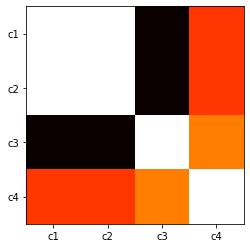

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1)
img = ax.imshow(corrs,cmap='hot',extent=[-1,1,-1,1])
ax.set_xticks([-0.75,-0.25,0.25,0.75])
ax.set_xticklabels(['c1','c2','c3','c4'])
ax.set_yticks([-0.75,-0.25,0.25,0.75])
ax.set_yticklabels(['c4','c3','c2','c1'])